In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler  # Or MinMaxScaler for normalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  # To calculate RMSE
import numpy as np  # For numerical computations
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [6]:
import sklearn

In [7]:
print(sklearn.__version__)

1.4.2


In [8]:
file_path = '../data/freshwater_dataset.xlsx'
df = pd.read_excel(file_path, 0)

In [9]:
df.head()

,SHIP-ROUTE,AVG_SPEED,DISTANCE,FRESH_WATER
0,OKI-JAKARTA,11.7,330.00,8000
1,JAKARTA-SURABAYA,11.6,438.00,8000
2,SURABAYA-BALIKPAPAN,10.4,600.00,13000
3,BALIKPAPAN-PALU,10.6,153.00,6000
4,PALU-SURABAYA,10.6,780.16,15000


# **Data Exploration**

In [10]:
df.shape

(88, 4)

In [11]:
df.describe()

,AVG_SPEED,DISTANCE,FRESH_WATER
count,88.000000,88.000000,88.000000
mean,9.047727,554.510890,15659.090909
std,1.189415,341.476929,11600.521554
min,5.700000,139.490000,2000.000000
25%,8.175000,248.000000,7000.000000
50%,8.850000,476.764167,12000.000000
75%,9.825000,641.153333,22250.000000
max,11.700000,1781.000000,55000.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SHIP-ROUTE   88 non-null     object 
 1   AVG_SPEED    88 non-null     float64
 2   DISTANCE     88 non-null     float64
 3   FRESH_WATER  88 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 2.9+ KB


In [13]:
def make_hist(column, xlabel, ylabel="Frequency", bins=5):
    plt.hist(data=df, x=column, bins=5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

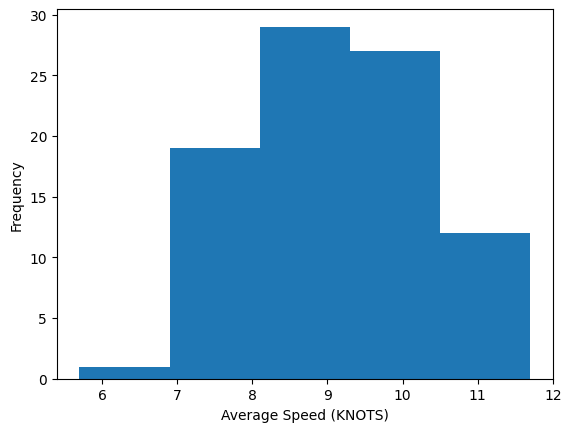

In [14]:
make_hist('AVG_SPEED', "Average Speed (KNOTS)")

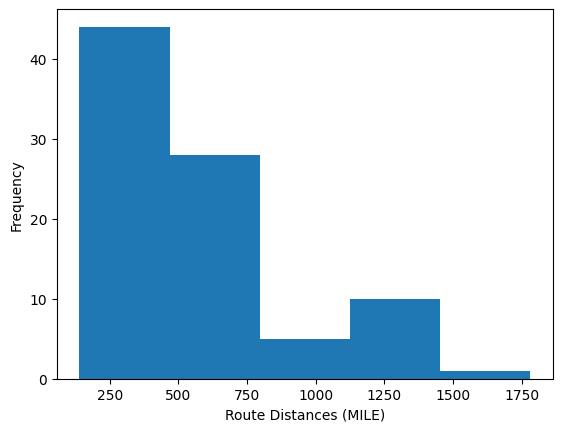

In [15]:
make_hist('DISTANCE', "Route Distances (MILE)")

# ***Data Preparation***

In [16]:
LabCoder = LabelEncoder()
LabCoder.fit(df['SHIP-ROUTE'])

LabelEncoder()

In [17]:
df['SHIP-ROUTE']

0             OKI-JAKARTA
1        JAKARTA-SURABAYA
2     SURABAYA-BALIKPAPAN
3         BALIKPAPAN-PALU
4           PALU-SURABAYA
             ...         
83        MAKASSAR-BAUBAU
84         BAUBAU-KENDARI
85         KENDARI-BAUBAU
86        BAUBAU-SURABAYA
87      SURABAYA-MAKASSAR
Name: SHIP-ROUTE, Length: 88, dtype: object

In [18]:
df['SHIP-ROUTE']=LabCoder.transform(df['SHIP-ROUTE'])

In [19]:
for i, label in enumerate(df['SHIP-ROUTE']):
  category = LabCoder.classes_[label]  # Look up category based on encoded label
  print(f"Sample {i+1}: Original category - '{category}', Encoded label - {label}")

Sample 1: Original category - 'OKI-JAKARTA', Encoded label - 21
Sample 2: Original category - 'JAKARTA-SURABAYA', Encoded label - 7
Sample 3: Original category - 'SURABAYA-BALIKPAPAN', Encoded label - 25
Sample 4: Original category - 'BALIKPAPAN-PALU', Encoded label - 1
Sample 5: Original category - 'PALU-SURABAYA', Encoded label - 22
Sample 6: Original category - 'SURABAYA-MAKASSAR', Encoded label - 27
Sample 7: Original category - 'MAKASSAR-BAUBAU', Encoded label - 14
Sample 8: Original category - 'BAUBAU-KENDARI', Encoded label - 3
Sample 9: Original category - 'KENDARI-SURABAYA', Encoded label - 11
Sample 10: Original category - 'SURABAYA-MAKASSAR', Encoded label - 27
Sample 11: Original category - 'MAKASSAR-BAU-BAU', Encoded label - 12
Sample 12: Original category - 'BAUBAU-KENDARI', Encoded label - 3
Sample 13: Original category - 'KENDARI-SURABAYA', Encoded label - 11
Sample 14: Original category - 'SURABAYA-MAKASSAR', Encoded label - 27
Sample 15: Original category - 'MAKASSAR-

In [20]:
df.head()

,SHIP-ROUTE,AVG_SPEED,DISTANCE,FRESH_WATER
0,21,11.7,330.00,8000
1,7,11.6,438.00,8000
2,25,10.4,600.00,13000
3,1,10.6,153.00,6000
4,22,10.6,780.16,15000


In [21]:
stdScaler = StandardScaler()

In [22]:
reshape_data = df['AVG_SPEED'].to_numpy()
reshape_data = reshape_data.reshape(-1, 1)

In [23]:
stdScaler.fit(reshape_data)

StandardScaler()

In [24]:
df['AVG_SPEED'] = stdScaler.transform(reshape_data)

In [25]:
df.head()

,SHIP-ROUTE,AVG_SPEED,DISTANCE,FRESH_WATER
0,21,2.242676,330.00,8000
1,7,2.158119,438.00,8000
2,25,1.143438,600.00,13000
3,1,1.312552,153.00,6000
4,22,1.312552,780.16,15000


In [26]:
normScaler = MinMaxScaler(feature_range=(-1, 1))

In [27]:
distance_reshape = df['DISTANCE'].to_numpy()
distance_reshape = distance_reshape.reshape(-1, 1)

In [28]:
normScaler.fit(distance_reshape)

MinMaxScaler(feature_range=(-1, 1))

In [29]:
df['DISTANCE'] = normScaler.transform(distance_reshape)

In [30]:
df.head()

,SHIP-ROUTE,AVG_SPEED,DISTANCE,FRESH_WATER
0,21,2.242676,-0.767884,8000
1,7,2.158119,-0.636298,8000
2,25,1.143438,-0.438919,13000
3,1,1.312552,-0.983540,6000
4,22,1.312552,-0.219414,15000


# ***Data Split***

In [31]:
FEATURES = ['SHIP-ROUTE', 'AVG_SPEED', 'DISTANCE'] 
TARGET = 'FRESH_WATER'

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df[FEATURES], df[TARGET], test_size=0.1, random_state=42)

In [33]:
knn_regressor = KNeighborsRegressor(n_neighbors=8)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [34]:
data_route = LabCoder.transform(["JAKARTA-SURABAYA"])[0]
data_speed = stdScaler.transform(np.array([11.6]).reshape(-1, 1))[0][0]
data_distance = normScaler.transform(np.array([438]).reshape(-1, 1))[0][0]

In [35]:
test_data = pd.DataFrame([[data_route, data_speed, data_distance]], columns=FEATURES)

In [36]:
test_data

,SHIP-ROUTE,AVG_SPEED,DISTANCE
0,7,2.158119,-0.636298


In [37]:
prediction = knn_regressor.predict(test_data)

In [38]:
print(f'Predicted fresh water usage: {prediction[0]}')

Predicted fresh water usage: 10625.0


In [39]:
import joblib

In [44]:
joblib.dump(knn_regressor, "../models/regressor.pkl")

['../models/regressor.pkl']

In [ ]:
with open('../models/model.pkl', 'wb') as model_file:
    pickle.dump(knn_regressor, model_file)

In [ ]:
import joblib

In [46]:
import pickle

In [47]:
with open('../models/route_encoder.pkl', 'wb') as route_encoder:
    pickle.dump(LabCoder, route_encoder)

In [48]:
with open('../models/route_encoder.pkl', 'rb') as file:
    encoder = pickle.load(file)

In [ ]:
route = encoder.transform(["OKI-JAKARTA"])

In [ ]:
route

In [49]:
with open('../models/speed_scaler.pkl', 'wb') as speed_scaler:
    pickle.dump(stdScaler, speed_scaler)

In [50]:
with open('../models/distance_scaler.pkl', 'wb') as distance_scaler:
    pickle.dump(normScaler, distance_scaler)